**Imports**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [50]:
#heloo
audio_files = glob('./Emotional Speech dataset/*/*.wav')

In [51]:
#Play audio file
ipd.Audio(audio_files[0])

In [52]:
y, sr = librosa.load(audio_files[0])

In [53]:
y

array([ 5.3765390e-08, -2.1233145e-08, -6.0478342e-09, ...,
        4.8083174e-14, -9.6233243e-15,  2.8714739e-14], dtype=float32)

In [54]:
sr

22050

In [55]:
print(f'y: {y[:10]}')
print(f' shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
 shape y: (72838,)
sr: 22050


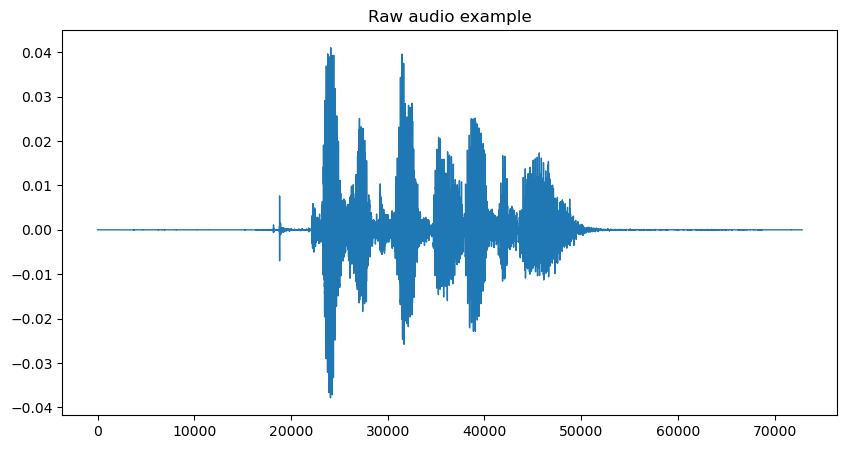

In [56]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio example')
plt.show()

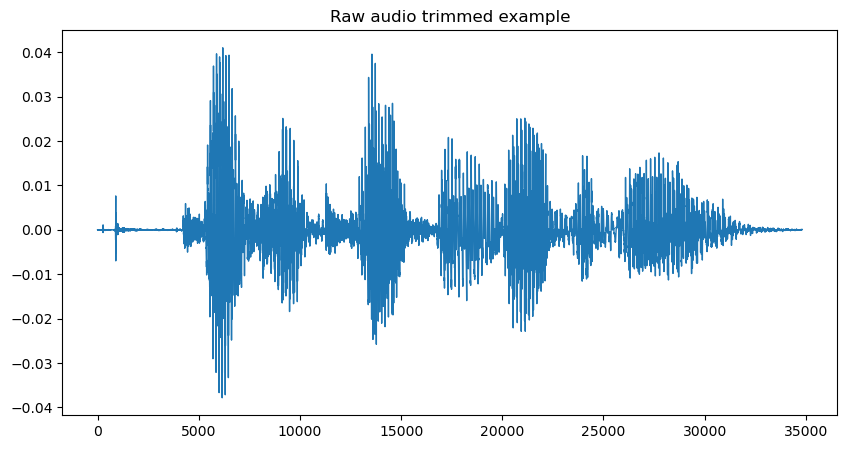

In [57]:
y_trimmed, _ = librosa.effects.trim(y, top_db=45)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio trimmed example')
plt.show()

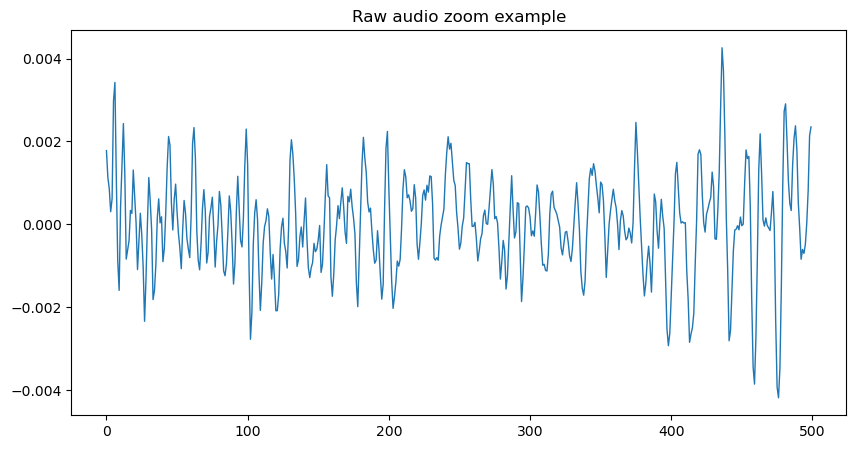

In [58]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5), lw=1, title='Raw audio zoom example')
plt.show()

**Spectogram**

In [59]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 143)

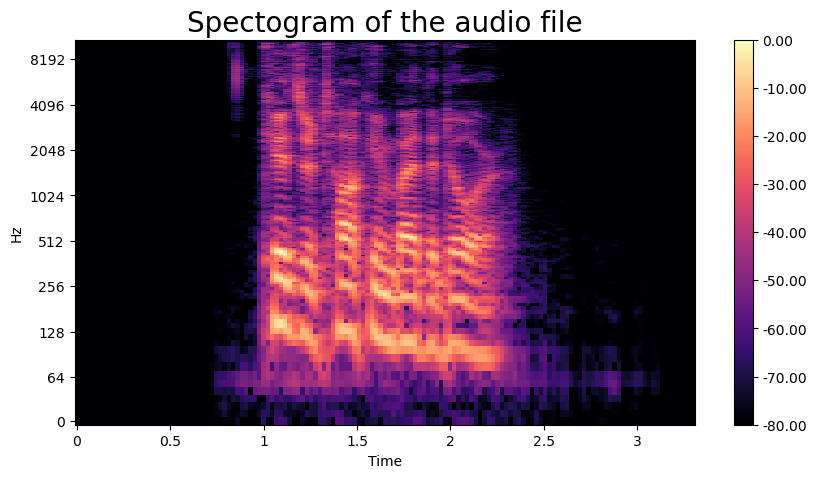

In [60]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)

ax.set_title('Spectogram of the audio file', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

**Mel Spectogram**

In [61]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


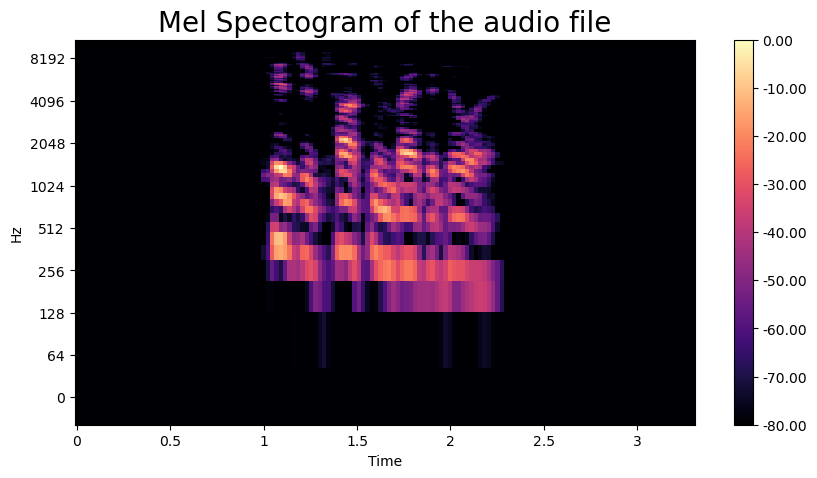

In [63]:
#Plot the mel spectrogram of the audio file
fig, ax = plt.subplots(figsize=(10, 5))

img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)

ax.set_title('Mel Spectogram of the audio file', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [64]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)